# California Housing Prices
Median house prices for California districts derived from the 1990 census.

**About Dataset** [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Get the Data

In [2]:
cal_housing=pd.read_csv('housing.csv')

In [3]:
cal_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
cal_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Data Cleaning

In [5]:
cal_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

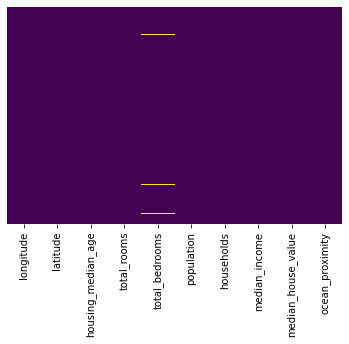

In [6]:
sns.heatmap(cal_housing.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
cal_housing=cal_housing.dropna() #Droping missing values

In [8]:
cal_housing=cal_housing.drop(['longitude','latitude'], axis=1) #Droping columns which are not necessary

In [9]:
cal_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20433 non-null  float64
 1   total_rooms         20433 non-null  float64
 2   total_bedrooms      20433 non-null  float64
 3   population          20433 non-null  float64
 4   households          20433 non-null  float64
 5   median_income       20433 non-null  float64
 6   median_house_value  20433 non-null  float64
 7   ocean_proximity     20433 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.4+ MB


### Exploratory Data Analysis

In [10]:
cal_housing.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


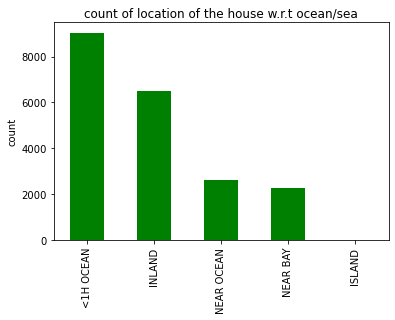

Number of Samples According to ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64


In [11]:
cal_housing['ocean_proximity'].value_counts().plot(kind='bar',color='green')
plt.ylabel('count')
plt.title('count of location of the house w.r.t ocean/sea')
plt.show()
print(f'Number of Samples According to ocean_proximity\n{cal_housing["ocean_proximity"].value_counts()}')

Text(0.5, 1.0, 'households')

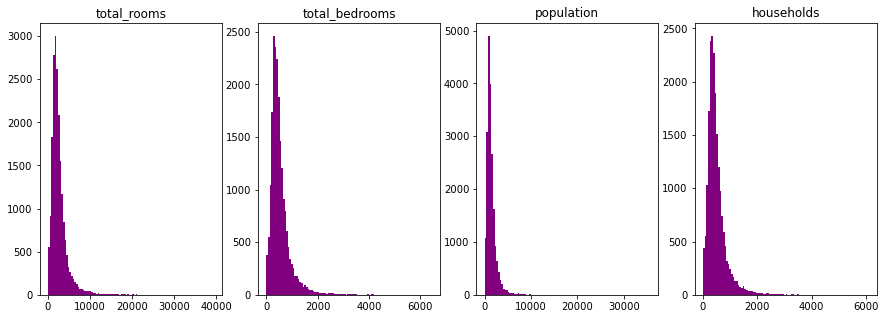

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].hist(cal_housing['total_rooms'],bins=100,color='purple')
axes[0].set_title('total_rooms')

axes[1].hist(cal_housing['total_bedrooms'],bins=100,color='purple')
axes[1].set_title('total_bedrooms')

axes[2].hist(cal_housing['population'],bins=100,color='purple')
axes[2].set_title('population')

axes[3].hist(cal_housing['households'],bins=100,color='purple')
axes[3].set_title('households')

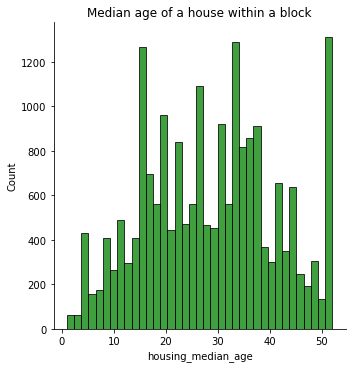

In [13]:
sns.displot(cal_housing['housing_median_age'],color='green')
plt.title('Median age of a house within a block')
plt.show()

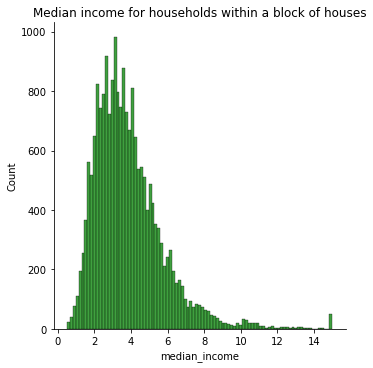

In [14]:
sns.displot(cal_housing['median_income'],color='green')
plt.title('Median income for households within a block of houses')
plt.show()

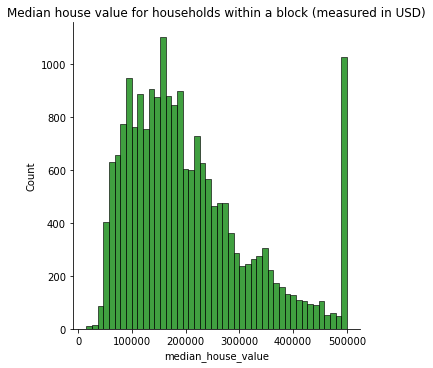

In [15]:
sns.displot(cal_housing['median_house_value'],color='green')
plt.title('Median house value for households within a block (measured in USD)')
plt.show()

<AxesSubplot:>

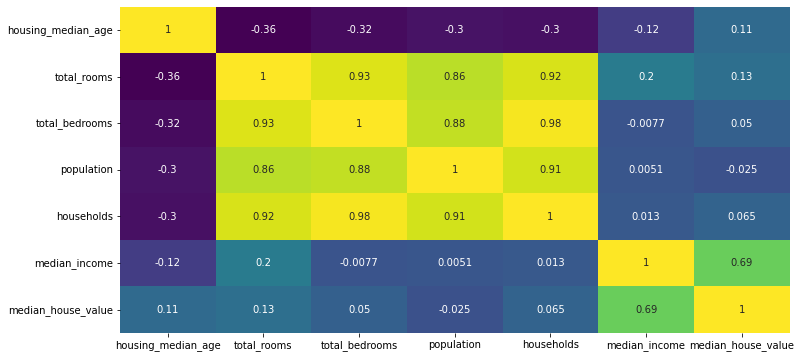

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(cal_housing.corr(),annot=True,cmap='viridis',cbar=False)

### Training a Linear Regression Model

In [17]:
ocean_proximity = pd.get_dummies(cal_housing['ocean_proximity'])
ocean_proximity

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [18]:
cal_housing.drop(['ocean_proximity'],axis=1,inplace=True)

In [19]:
cal_housing=pd.concat([cal_housing,ocean_proximity],axis=1)

In [20]:
cal_housing.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value', '<1H OCEAN',
       'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

#### x and y arrays

In [21]:
x=cal_housing[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population','households', 'median_income',
              '<1H OCEAN','INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']]
y=cal_housing['median_house_value']

#### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

### Creating and Training the Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()

In [26]:
lm.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [27]:
# print the intercept
print(lm.intercept_)

68382.67782409483


In [28]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
housing_median_age,1131.117650
total_rooms,-8.281569
total_bedrooms,97.361439
population,-33.931672
households,54.962132
median_income,40737.209177
<1H OCEAN,-43169.581581
INLAND,-109740.076154
ISLAND,215014.623165
NEAR BAY,-35124.986712


Interpreting the coefficients:

-Holding all other features fixed, a 1 unit increase in **housing_median_age** is associated with an *increase of USD 1131.11*.\
-Holding all other features fixed, a 1 unit increase in **total_rooms** is associated with an *decrease of USD 8.28*.\
-Holding all other features fixed, a 1 unit increase in **total_bedrooms** is associated with an *increase of USD 97.36*.\
-Holding all other features fixed, a 1 unit increase in **population** is associated with an *decrease of USD 33.93*.\
-Holding all other features fixed, a 1 unit increase in **households** is associated with an *increase of USD 54.96*.\
-Holding all other features fixed, a 1 unit increase in **median_income** is associated with an *increase of USD 40737.20*.\
-Holding all other features fixed, if location of the house is **<1H OCEAN** then the value *decrease by USD 43169.58*.\
-Holding all other features fixed, if location of the house is **INLAND** then the value *decrease by USD 109740.07*.\
-Holding all other features fixed, if location of the house is **ISLAND** then the value *increase by USD 215014.62*.\
-Holding all other features fixed, if location of the house is **NEAR BAY** then the value *decrease by USD 35124.98*.\
-Holding all other features fixed, if location of the house is **NEAR OCEAN** then the value *decrease by USD 26979.97*.

### Predictions from our Model

In [29]:
predictions = lm.predict(x_test)

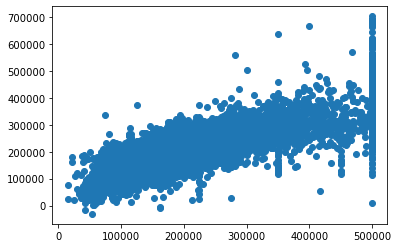

In [30]:
plt.scatter(y_test,predictions)

C:\Users\91964\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


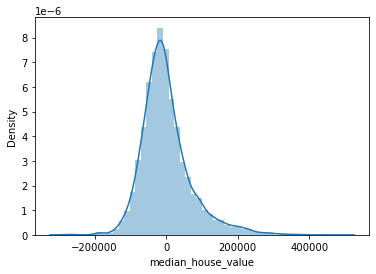

In [31]:
sns.distplot((y_test-predictions),bins=50);

### Regression Evaluation Metrics

In [32]:
from sklearn import metrics

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 50673.49642093799
MSE: 4930949167.2087965
RMSE: 70220.71750707761
